In [1]:
from IPython.display import HTML
HTML('<div style="text-align: center;"><img src="imageillustration.png" alt="Image"></div>')

<html>
<head>
    <title>Sommaire</title>
    <style>
        .section {
            border: 1px solid #cccccc;
            padding: 10px;
            margin: 10px 0;
        }
    </style>
</head>
<body>

<div id="sommaire" style="background-color: #CCCCFF; text-align: center; border: 2px solid #289C4E; border-radius: 10px; padding: 20px 10px; margin: 10px; font-family: 'Candara', sans-serif; font-weight: bold;">
    <h2 style="color:289C4E; text-decoration: underline; margin: 0; padding: 0; text-shadow: 1px 1px 1px black; font-size: larger;">Sommaire</h2>
    <div style="text-align: center; margin-top: 20px; font-size: larger;">
        <a href="#1" style="color: green; text-decoration: none; text-shadow: 1px 1px 1px black; font-size: larger;">📇 1. Data pre-processing 📇</a><br>
        <a href="#2" style="color: red; text-decoration: none; text-shadow: 1px 1px 1px black; font-size: larger;">📊 2. Data visualization 📊</a><br>
        <a href="#3" style="color: blue; text-decoration: none; text-shadow: 1px 1px 1px black; font-size: larger;">📐 3. Modeling 📐</a>
    </div>
</div>

</body>
</html>


> **Diabetes 130-US hospitals for years 1999-2008**
---


<style>
.now-font {
    font-family: 'Now', sans-serif;
}
</style>

<div class="now-font">
    <u><h2>Dataset</h2></u>

   <br>
   <br>
   <b>What do the instances in this dataset represent? </b><br>
    The instances represent hospitalized patient records diagnosed with diabetes.<br>

   <br>
   <br>
   <b> Are there recommended data splits? </b>
    <br>
    No recommendation. The standard train-test split could be used. Can use three-way holdout split (i.e., train-validation-  test) when doing model selection.<br><br>
    
   <b>Does the dataset contain data that might be considered <span style="color:red;">sensitive</span> in any way?</b><br>
    Yes. The dataset contains information about the age, gender, and race of the patients.<br><br>
    
   <b>Additional Information :</b><br>
    The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.<br>
    (1) It is an inpatient encounter (a hospital admission).<br>
    (2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.<br>
    (3) The length of stay was at least 1 day and at most 14 days.<br>
    (4) Laboratory tests were performed during the encounter.<br>
    (5) Medications were administered during the encounter.<br>
    <br>
    The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.
</div>

<br>
<br>


<div class="alert alert-block alert-success" style="text-align: center; font-size: 30px; font-weight: bold;">  
   <a class='anchor' id='1'></a>
   📇 1. Data Pre-Processing 📇
</div>

<div style="background-color: #289C4E; padding: 10px; border-radius: 5px; text-align: center;">
    <a href="#sommaire" style="text-decoration: none; color: white; font-size: 18px; font-weight: bold;">
        🚀 Retour au sommaire 🚀
    </a>
</div>

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">

   <b><h3>· Importation</h3></b>

</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['lightseagreen', 'teal', 'darkslategrey']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/diabetes+130-us+hospitals+for+years+1999-2008.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
df = pd.read_csv("./diabetic_data.csv")
dfc = df.copy()

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">

Now let's have a look on every columns :<br><br>


* <b> encounter_id </b> : id of the patient encounter for each visit <br><br>
* <b>patient_nbr </b>: id of the patient<br><br>
* <b>  race </b>: Race of the patient (String)<br><br>
  1.   Caucasian<br>
  2.   AfricanAmerican<br>
  3.   Hispanic<br>
  4.   Asian<br>
  5.   Other<br><br>
* <b>  gender </b>: gender of the patient (String)<br><br>
  1.   Female<br>
  2.   Male<br>
  3.   Unknown/Invalid<br><br>
* <b>  age </b>: age range of the patient ([0-10), [10,20)...)<br><br>
* <b>  weight </b>: weight of the patient by ranges<br><br>
* <b>  admission_type_id </b>: id of the type of admission (emergency, urgent, ...) - int in [1,8]<br><br>
* <b>  discharge_disposition_id </b>: id of the place the patient was discharged to (discharged to home, other) - int in [1,27]<br><br>
* <b>  admission_source_id </b>: means of admission into hospital (emergency, referral...) int in [1,25]<br><br>
* <b>  time_in_hospital </b>: int number of days between admission and discharge<br><br>
* <b>  medical_specialty </b>: specialty of the admitting physician (cardiology, orthopedics...) (String)<br><br>
* <b>  num_lab_procedures </b>: number of lab tests performed during encounter (int)<br><br>
* <b>  num_procedures </b>: number of medical procedures performed during encounter (int)<br><br>
* <b>  num_medications </b>: number of distinct generic names administered during the encounter (int)<br><br>
* <b>  number_outpatient </b>: number of outpatient visits of the patient in the year preceding the encounter (int)<br><br>
* <b>  number_emergency </b>: number of emergency visits of the patient in the year preceding the encounter (int)<br><br>
* <b>  number_inpatient </b>: number of inpatient visits of the patient in the year preceding the encounter (int)<br><br>
* <b>  diag_1, diag_2, diag_3 </b>: primary, secondary and additional diagnoses of the patient (int)<br><br>
* <b>  number_diagnoses </b>: number of diagnoses (int)<br><br>
* <b>  max_glu_serum </b>: Indicates the range of the result in mg/dL or if the Glucose serum test was not taken<br><br>
  1. ">200"<br>
  2. ">300"<br>
  3. Norm (indicating normal)<br>
  4. None<br><br>
* <b>  A1Cresult </b>: Indicates the range of the result in percentages or if the A1c test was not taken<br><br>
  1. ">7" (greater than 7%, but less than 8%)<br>
  2. ">8" (greater than 8%)<br>
  3. Norm (indicating normal, which is less than 7%)<br>
  4. None<br><br>
* <b>  17 Medication columns </b>: Indicate whether the drug was prescribed or there was a change in the dosage (String)<br><br>
  1. No<br>
  2. Steady<br>
  3. Down<br>
  4. Up<br><br>
* <b>  change </b>: Indicates if there was a change in diabetic medications (String)<br><br>
  1. Ch (change)<br>
  2. No (no change)<br><br>
* <b>  diabetesMed </b>: Binary attribute indicating whether there was any diabetic medication prescribed<br><br>
  1. No<br>
  2. Yes<br><br>
* <b>  readmitted </b>: Attribute indicating whether the patient was readmitted and when. Can also be used as a target variable:<br><br>
  1. NO<br>
  2. ">30" (readmitted in more than 30 days)<br>
  3. "<30" (readmitted in less than 30 days)<br><br>
  
    
</div>

In [ ]:
dfc.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">

   <b><h3>· Cleaning</h3></b>

</div>


<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">

Firslty, we will replace all the '?' values of the dataset by the null value :  


</div>

In [ ]:
dfc.replace('?', np.nan, inplace=True)

In [ ]:
missing_val = dfc.isna().sum()
percentage_mv = (missing_val/len(dfc))*100
array = pd.concat([missing_val,percentage_mv], axis=1)
array.columns = ['Missing values', 'Percentage (%)']
print(array)
print('among ',len(dfc), ' rows in the dataset.')

                          Missing values  Percentage (%)
encounter_id                           0        0.000000
patient_nbr                            0        0.000000
race                                2273        2.233555
gender                                 0        0.000000
age                                    0        0.000000
weight                             98569       96.858479
admission_type_id                      0        0.000000
discharge_disposition_id               0        0.000000
admission_source_id                    0        0.000000
time_in_hospital                       0        0.000000
payer_code                         40256       39.557416
medical_specialty                  49949       49.082208
num_lab_procedures                     0        0.000000
num_procedures                         0        0.000000
num_medications                        0        0.000000
number_outpatient                      0        0.000000
number_emergency               

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    
Several columns have a lot of missing values. In the columns diag1, diag2, diag3, we miss up to 1.4% of data.
However, we miss almost half of the datas in 'payer_code' and 'medical_speciality' columns.
And we miss more than 96% of data in weight column. We should get rid of these columns.


</div>


In [ ]:
# gender takes values such that
dfc['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [ ]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    
We drop duplicate rows if there are some :


</div>

In [ ]:
len_before = len(dfc)
dfc.drop_duplicates(inplace=True)
len_after = len(dfc)
print('No duplicate rows') if len_before==len_after else print(len_before-len_after,' rows deleted')

No duplicate rows


<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    
We drop all the unnecessary columns :


</div>

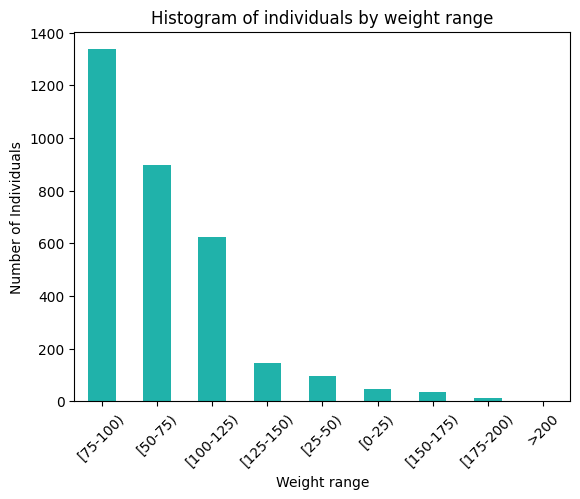

In [ ]:
num = dfc['weight'].value_counts()

num.plot(kind='bar', color='lightseagreen')
plt.title('Histogram of individuals by weight range')
plt.xlabel('Weight range')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#We planned to drop the id columns but it appears that it can be interesting to keep them. But columns with tou many missing values are being dropped.
cols_to_drop = [
    'weight',
    'payer_code',
    'medical_specialty'
    ]
dfc = dfc.drop(cols_to_drop, axis=1)

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    
<b> <h3>· Dealing with null values</h3></b>


</div>

In [ ]:
#We delete the null values in the columns diag_1, diag_2, diag_3, race
dfc = dfc.dropna(subset=['diag_1', 'diag_2', 'diag_3', 'race'])

#and the Unknown/Invalid rows for gender
dfc = dfc[dfc['gender'] != 'Unknown/Invalid']


<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    
We check if any column takes only one value. Columns with the same value for all records are bring nothing to interpretation so we can delete them.

</div>



In [ ]:
one_val_col = []

for column in dfc.columns:
    if len(dfc[column].unique()) == 1:
        one_val_col.append(column)
one_val_col

['examide', 'citoglipton', 'metformin-rosiglitazone']

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    
Both can be dropped :

</div>

In [ ]:
dfc = dfc.drop(['examide', 'citoglipton', 'metformin-rosiglitazone'], axis = 1)

In [ ]:
missing_val = dfc.isna().sum()
percentage_mv = (missing_val/len(dfc))*100
array = pd.concat([missing_val,percentage_mv], axis=1)
array.columns = ['Missing values', 'Percentage (%)']
print(array)
print('among ',len(dfc), ' rows in the dataset.')

                          Missing values  Percentage (%)
encounter_id                           0             0.0
patient_nbr                            0             0.0
race                                   0             0.0
gender                                 0             0.0
age                                    0             0.0
admission_type_id                      0             0.0
discharge_disposition_id               0             0.0
admission_source_id                    0             0.0
time_in_hospital                       0             0.0
num_lab_procedures                     0             0.0
num_procedures                         0             0.0
num_medications                        0             0.0
number_outpatient                      0             0.0
number_emergency                       0             0.0
number_inpatient                       0             0.0
diag_1                                 0             0.0
diag_2                         

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    

We chose to treat number_outpatient, number_emergency and number_inpatient columns in a unique column because of their link. This new column will be called number_services to count the number of hospital services the patient has used in the past year.

</div>




In [ ]:
dfc['number_services'] = dfc['number_outpatient'] + dfc['number_emergency'] + dfc['number_inpatient']

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    

<i>Now we must deal with remaining categorical columns to process their type into numerical type:</i>
</div>

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">  <b> <h3>· Numerical normalization</h3></b>
    
Moreover, the dataset contains 23 columns all taking four different values : 'No', 'Up', 'Down' or 'Steady'.
We will modify this column into a binary value to make a difference between patients who have modifications in their treatment, and patients who have steady treatments.

As us this enable to categorize the patients in a more relevant manner because, obviously, patients who have a modification in their treatments mean they were not cured by their current medicine so they got readmitted.
</div>






In [ ]:
medicines_col = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-pioglitazone'
]

# We create temporary columns to make our numchange column
for col in medicines_col:
    temp_col_name = col + '_temp'
    dfc[temp_col_name] = dfc[col].replace({'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1})

# numchange is the sum of temporary columns (number of changes)
temp_cols = [col + '_temp' for col in medicines_col]
dfc['numchange'] = dfc[temp_cols].sum(axis=1)

# We drop the temporary cols
dfc.drop(columns=temp_cols, inplace=True)

# We modify the values of medicines
for col in medicines_col:
    dfc[col] = dfc[col].apply(lambda x: 0 if x == 'No' else 1)


In [ ]:
dfc['numchange'].value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: numchange, dtype: int64

In [ ]:
#Race
dict_race = {'Caucasian': 1, 'AfricanAmerican': 2, 'Asian': 3, 'Hispanic': 4, 'Other': 5}
dfc['race'] = dfc['race'].replace(dict_race)

#Gender
dfc['gender'] = dfc['gender'].replace('Male', 0)
dfc['gender'] = dfc['gender'].replace('Female', 1)

#Age
dict_age = {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8, '[80-90)': 9, '[90-100)': 10}
dfc['age'] = dfc['age'].replace(dict_age)

#A1Cresult
# We consider that >7 and >8 are both too important results so coded in the same value
dict_a1c = {'>7': 1, '>8': 1, 'Norm': 0, 'None': -1}
dfc['A1Cresult'] = dfc['A1Cresult'].replace(dict_a1c)

#Max_glu_serum
# Same consideration than for A1C
dict_glu_serum = {'>200': 1, '>300': 1, 'Norm': 0, 'None': -1}
dfc['max_glu_serum'] = dfc['max_glu_serum'].replace(dict_glu_serum)

#Change
dict_change = {'Ch': 1, 'No': 0}
dfc['change'] = dfc['change'].replace(dict_change)

#DiabetesMed
dict_diabetesMed = {'Yes': 1, 'No': 0}
dfc['diabetesMed'] = dfc['diabetesMed'].replace(dict_diabetesMed)

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    

ICD-9 classes are coding categories for medical diseases and symptoms.
    
Diagnostic code description (ICD9) :
https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp/physicians/diagnostic-code-descriptions-icd-9
    
    
Let's link the codes with their description : 
</div>






In [ ]:
# Dictionnary of classification of diagnostics
icd9_classes = {
    1: range(1, 140),     # Infection and Parasitic Diseases
    2: range(140, 240),   # Neoplasms
    3: range(240, 280),   # Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders
    4: range(280, 290),   # Diseases of Blood and Blood Forming Organs
    5: range(290, 320),   # Mental Disorders
    6: range(320, 390),   # Diseases of Nervous System and Sense Organs
    7: range(390, 460),   # Diseases of the Circulatory System
    8: range(460, 520),   # Diseases of the Respiratory System
    9: range(520, 580),   # Diseases of the Digestive System
    10: range(580, 630),  # Diseases of the Genitourinary System
    11: range(630, 680),  # Complications of Pregnancy, Childbirth and the Puerperium
    12: range(680, 710),  # Diseases of the Skin and Subcutaneous Tissue
    13: range(710, 740),  # Diseases of the Musculoskeletal System and Connective Tissue
    14: range(740, 760),  # Congenital Anomalies
    15: range(760, 780),  # Certain Conditions Originating in the Perinatal Period
    16: range(780, 800),  # Symptoms, Signs and Ill-defined Conditions
    17: range(800, 1000), # Injury and Poisoning
    # Codes starting by V or E
    18: 'V',              # Supplementary Factors Influencing Health Status and Contact with Health Services
    19: 'E'               # External causes of injury and supplemental classification
}


def icd9_to_class_code(icd_code):
    # Handle special cases for 'V' and 'E' codes first
    if icd_code[0] == 'V':
        return 0
    if icd_code[0] == 'E':
        return 0

    # Remove decimal point for comparison, if it exists
    icd_code_num = int(icd_code.replace('.', '')) if '.' in icd_code else int(icd_code)

    # Iterate through the dictionary and check the range
    for class_code, codes_range in icd9_classes.items():
        # Check if the numeric code is within the range specified
        # If codes_range is a range object, use the start and stop attributes for comparison
        if isinstance(codes_range, range):
            if codes_range.start <= icd_code_num < codes_range.stop:
                return class_code
    # Return a default class if no range matches
    return 0  # Assuming you want to default to class 0 if no other class is matched


dfc['diag_1'] = dfc['diag_1'].astype(str)
dfc['diag_2'] = dfc['diag_2'].astype(str)
dfc['diag_3'] = dfc['diag_3'].astype(str)
# Each value of the three colomns are coded and classified by icd9 classes
dfc['diag_1'] = dfc['diag_1'].apply(icd9_to_class_code)
dfc['diag_2'] = dfc['diag_2'].apply(icd9_to_class_code)
dfc['diag_3'] = dfc['diag_3'].apply(icd9_to_class_code)

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    


To address the issue of patients with multiple encounters in the dataset, various techniques were explored to consolidate these encounters, such as:

1. Counting more than two readmissions across multiple encounters as a single readmission.
2. Considering the average hospital stay across multiple encounters.
3. Evaluating the percentage of medication changes across encounters.
4. Replacing the unique encounter ID with the total number of encounters.
5. Combining diagnoses from multiple encounters into a list.

However, combining certain features like diagnoses into an array was found to be impractical for modeling. Separate consideration of the first and last encounters was also explored. The last encounters resulted in highly imbalanced data for readmissions (96% No Readmissions vs 4% Readmissions), leading to the decision to use only the first encounters of patients with multiple encounters. This approach reduced the dataset to about 68,000 encounters.
</div>







In [ ]:
dfc = dfc.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
dfc.shape

(68629, 46)

<div style="background-color: #E0F0D7; padding: 10px; border-radius: 5px;">
    



And finally, we must deal with the column that will represent the target column for our models of machine learning : 'readmitted'.
</div>





In [ ]:
dfc['readmitted'].unique()

array(['>30', 'NO', '<30'], dtype=object)

<div style="background-color: #dff0d8; padding: 10px; border-radius: 5px;">
    



We will group patients readmitted after 30 days with those not readmitted. This approach is based on the finding that early readmissions (within 30 days) are a more critical indicator for diabetic patients.

Source : https://pubmed.ncbi.nlm.nih.gov/28702257/
</div>





In [ ]:
dfc['readmitted'] = dfc['readmitted'].replace('<30', 1)
dfc['readmitted'] = dfc['readmitted'].replace('>30', 0)
dfc['readmitted'] = dfc['readmitted'].replace('NO', 0)

In [ ]:
dfc.dtypes

encounter_id                int64
patient_nbr                 int64
race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int64
diag_2                      int64
diag_3                      int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide   

In [ ]:
dfc.to_csv('/content/drive/MyDrive/diabetic_data_clean.csv', index=False)

<div class="alert alert-block alert-danger" style="text-align: center; font-size: 30px; font-weight: bold;">  
   <a class='anchor' id='2'></a>
   📊 2. Data Visualization 📊
</div>

<div style="background-color: red; padding: 10px; border-radius: 5px; text-align: center;">
    <a href="#sommaire" style="text-decoration: none; color: white; font-size: 18px; font-weight: bold;">
        🚀 Retour au sommaire 🚀
    </a>
</div>

<div style="background-color: #F0DEDE; padding: 10px; border-radius: 5px;">
    



We now create severals visuals concerning the dataset to get more information about what we're working on :
</div>

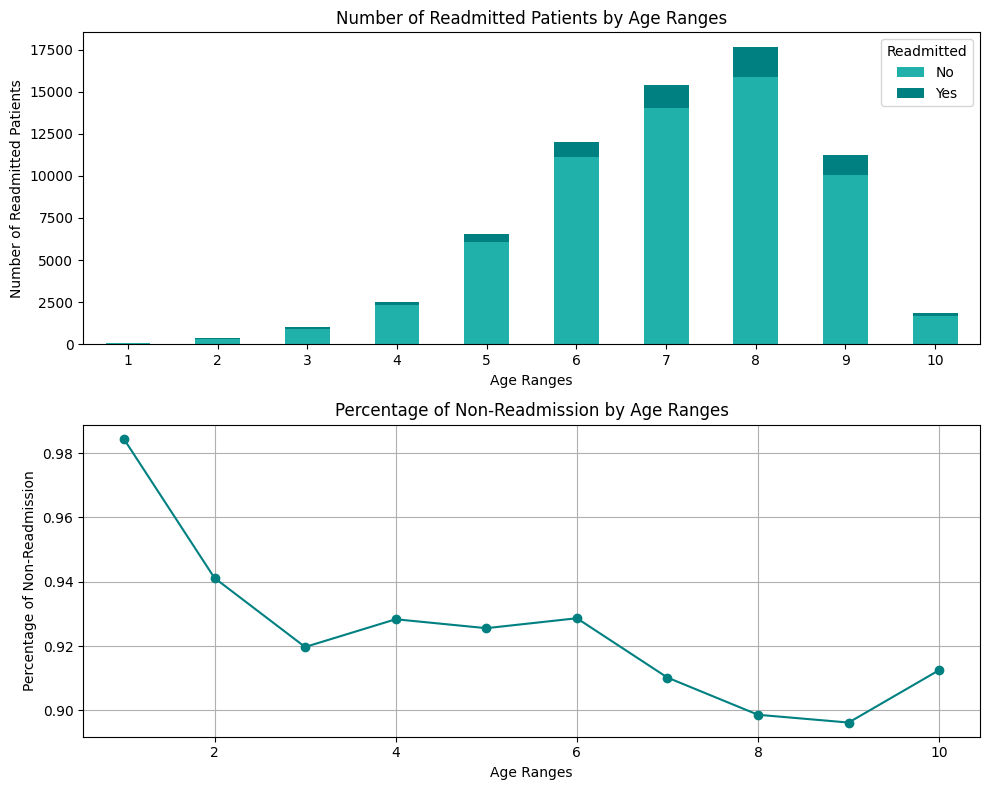

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

dfc['readmittedTemp'] = dfc['readmitted'].map({0: 'No', 1: 'Yes'})

readmitted_counts = dfc.groupby('age')['readmittedTemp'].value_counts().unstack().fillna(0)
readmitted_no_percentage = dfc.groupby('age')['readmittedTemp'].apply(lambda x: (x == 'No').mean())

dfc = dfc.drop('readmittedTemp', axis=1)

# Histogram for number of readmitted patients by age ranges
readmitted_counts.plot(kind='bar', stacked=True, ax=axes[0], color=colors)
axes[0].set_title('Number of Readmitted Patients by Age Ranges')
axes[0].set_xlabel('Age Ranges')
axes[0].set_ylabel('Number of Readmitted Patients')
axes[0].legend(title='Readmitted')
axes[0].tick_params(axis='x', rotation=0)

# percentage of 'No' values in readmitted col by age ranges
axes[1].plot(readmitted_no_percentage, marker='o', color='teal')
axes[1].set_title('Percentage of Non-Readmission by Age Ranges')
axes[1].set_xlabel('Age Ranges')
axes[1].set_ylabel('Percentage of Non-Readmission')
axes[1].grid(True)


plt.tight_layout()
plt.show()
#ajouter commentaire

<div style="background-color: #F0DEDE; padding: 10px; border-radius: 5px;">
    

We can observe from these graphs that there is a higher prevalence of diabetes in older age groups. Furthermore, if we consider that a person who has not been readmitted is either cured or receiving effective treatment, we notice a plateau from the ages of 20 to 100 years. This suggests that children may have a better resistance to this disease.
</div>




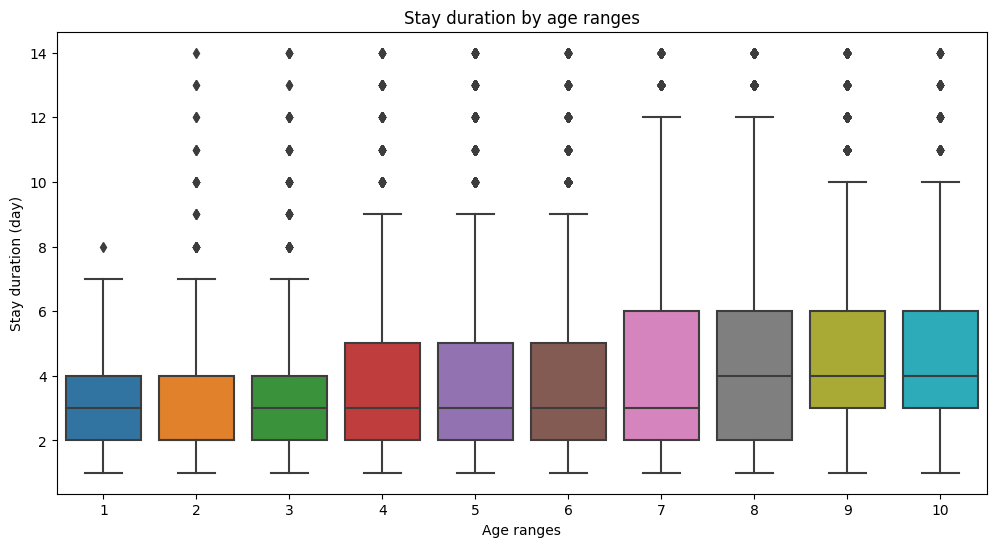

In [ ]:
# Boxplot of stay duration by age ranges
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='time_in_hospital', data=dfc)
plt.title('Stay duration by age ranges')
plt.xlabel('Age ranges')
plt.ylabel('Stay duration (day)')
plt.xticks(rotation=0)
plt.show()

<div style="background-color: #F0DEDE; padding: 10px; border-radius: 5px;">
    


We can observe that the length of the interquartile range of the boxplots tends to increase with the age ranges. This suggests that older patients generally have longer hospital stays. This highlights the findings of the previous observation: younger people tend to be more resilient than older individuals
</div>



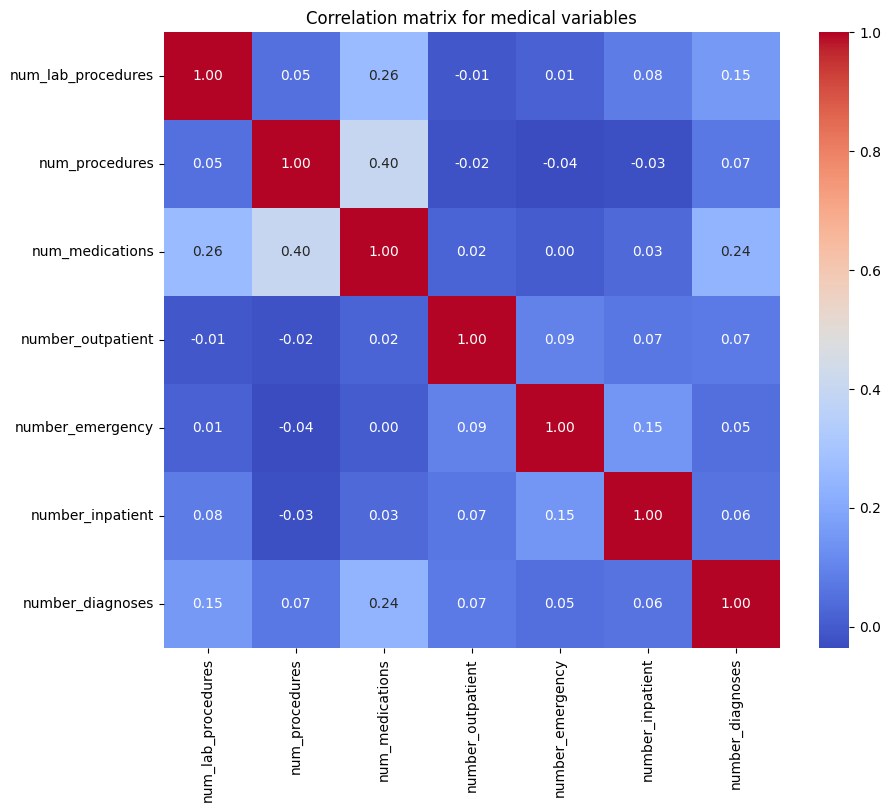

In [ ]:
# Columns to correlate
cols_of_interest = ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
                    'number_emergency', 'number_inpatient', 'number_diagnoses']

# correlation matrix calculation
correlation_matrix = dfc[cols_of_interest].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation matrix for medical variables')
plt.show()


<div style="background-color: #F0DEDE; padding: 10px; border-radius: 5px;">
    


We tried to get a correlation between any of the numeric variables, corresponding to the number of medications, protocols, encounters, diagnosses...
It appears that there is no relevant correlation between these variables. The illness seems to have several curing procedures. Thus we need to establish predictive model in our model.
</div>



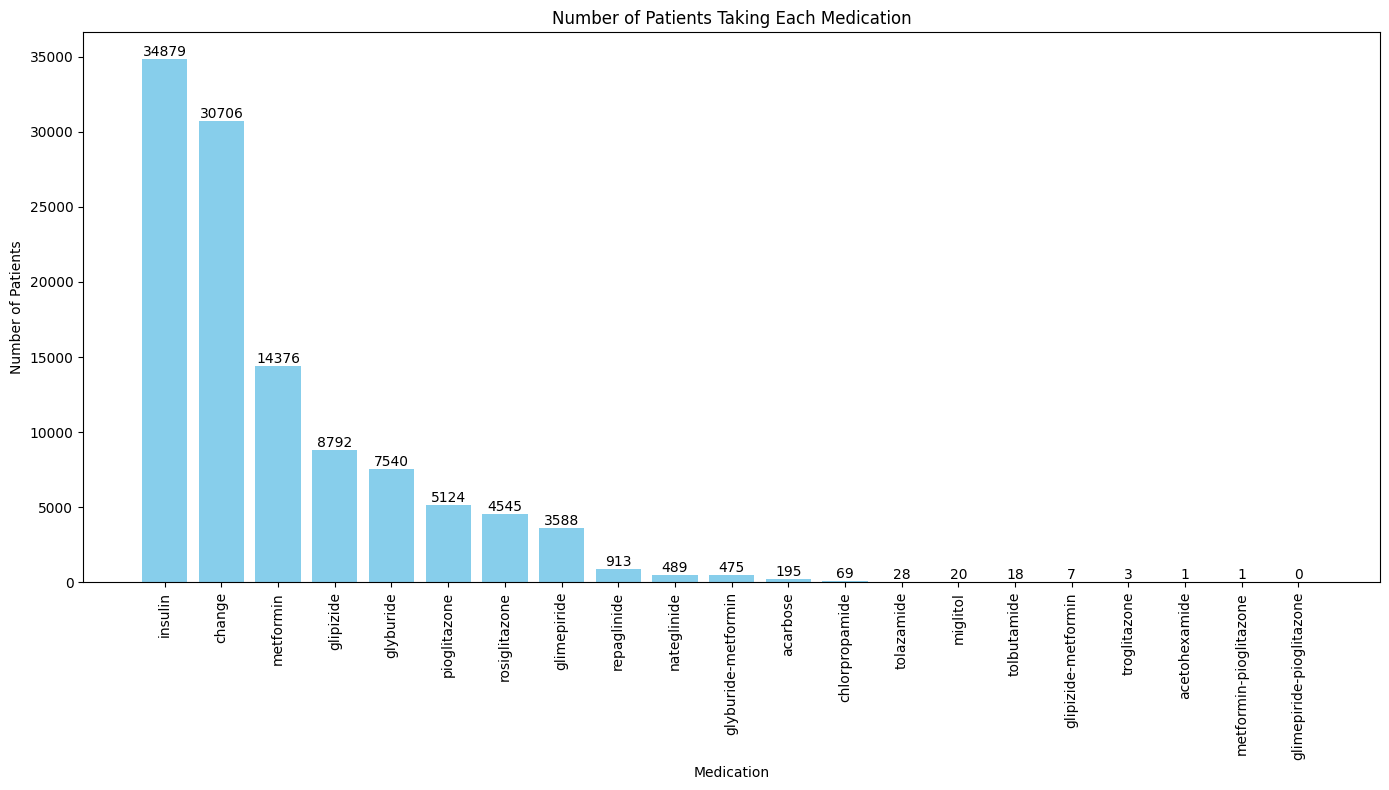

In [ ]:
medication_columns = dfc.columns[21:42]
medication_usage = (dfc[medication_columns] != 0).sum().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
bars = plt.bar(medication_usage.index, medication_usage, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Number of Patients Taking Each Medication')
plt.xlabel('Medication')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


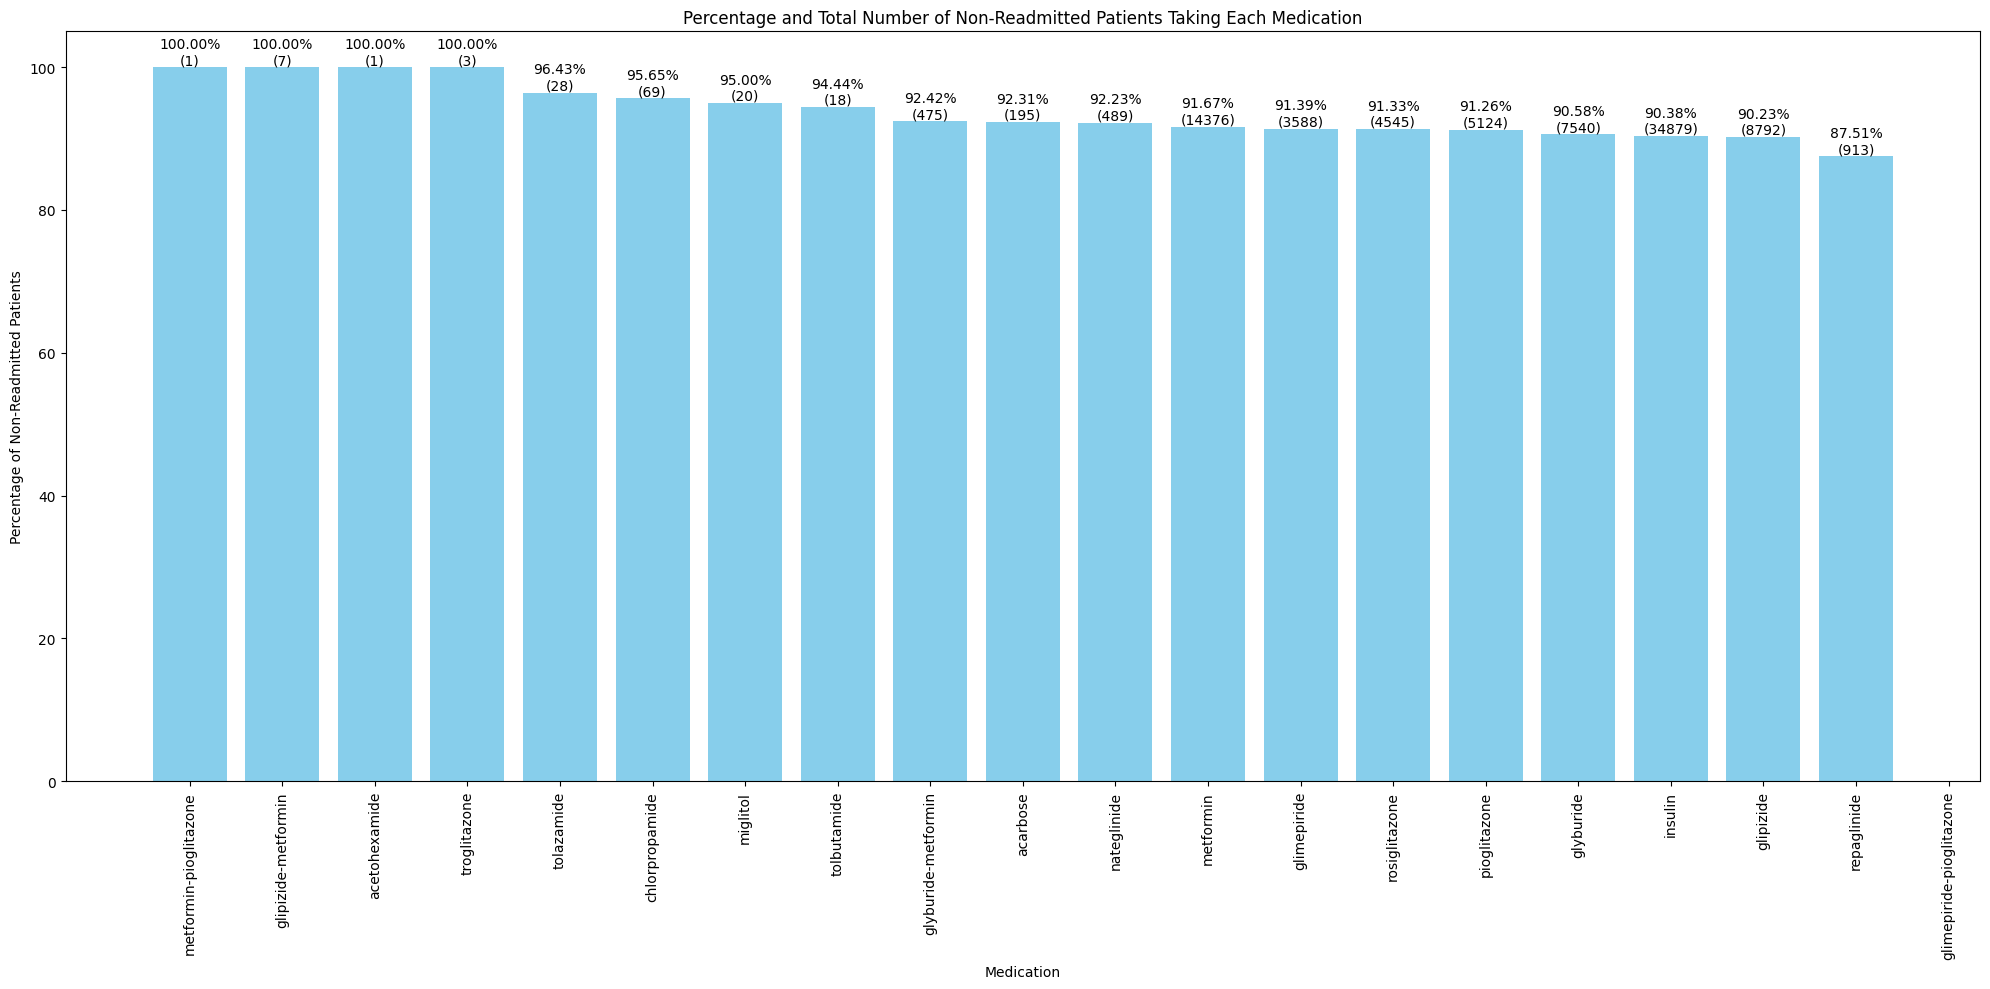

In [ ]:
medication_columns = dfc.columns[21:41]

total_medication_usage = (dfc[medication_columns] != 0).sum()
non_readmitted_usage = dfc[dfc['readmitted'] == 0][medication_columns].apply(lambda x: (x != 0).sum())

percentage_non_readmitted = (non_readmitted_usage / total_medication_usage * 100).sort_values(ascending=False)
sorted_total_usage = total_medication_usage[percentage_non_readmitted.index]

plt.figure(figsize=(20, 10))  # Ajustez la taille du graphique si nécessaire
bars = plt.bar(percentage_non_readmitted.index, percentage_non_readmitted, color='skyblue')

# display fontsize
fontsize = 10

# Add each value on top of each bar
for bar, total in zip(bars, sorted_total_usage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,
             f'{yval:.2f}%\n({total})', ha='center', va='bottom', fontsize=fontsize)

plt.title('Percentage and Total Number of Non-Readmitted Patients Taking Each Medication')
plt.xlabel('Medication')
plt.ylabel('Percentage of Non-Readmitted Patients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<div style="background-color: #F0DEDE; padding: 10px; border-radius: 5px;">
    


<i>100% medications aren't relevant, as they are very rarely distributed</i>
</div>



<ipython-input-200-74d890529b3a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(dfc.loc[(dfc['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-200-74d890529b3a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(dfc.loc[(dfc['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


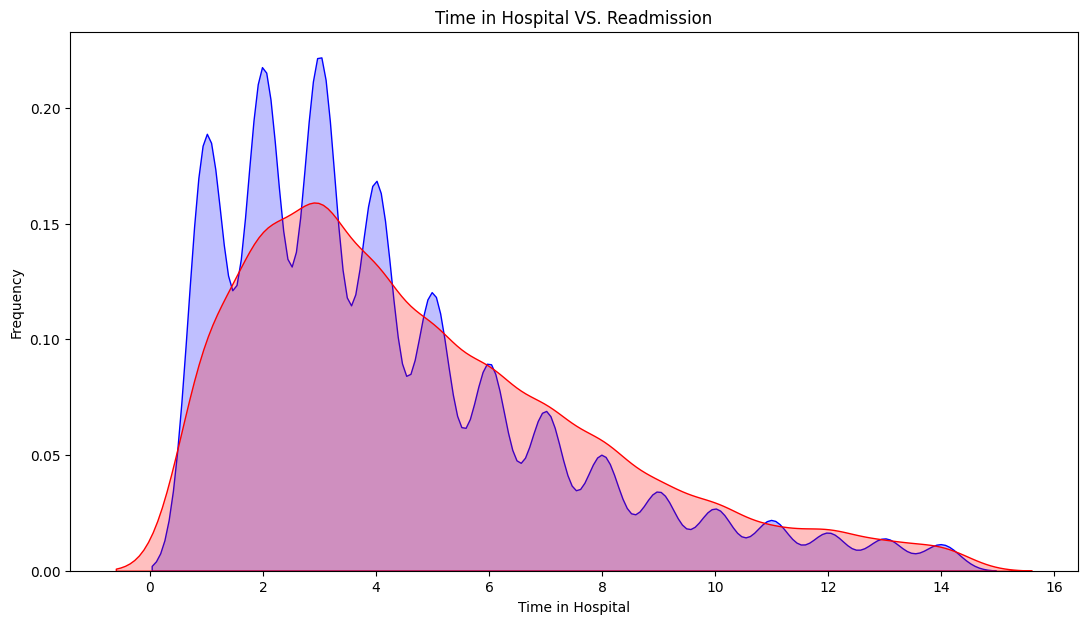

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(dfc.loc[(dfc['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(dfc.loc[(dfc['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

plt.show()


<ipython-input-206-ae9eb329f6f8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(dfc.loc[(dfc['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-206-ae9eb329f6f8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(dfc.loc[(dfc['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


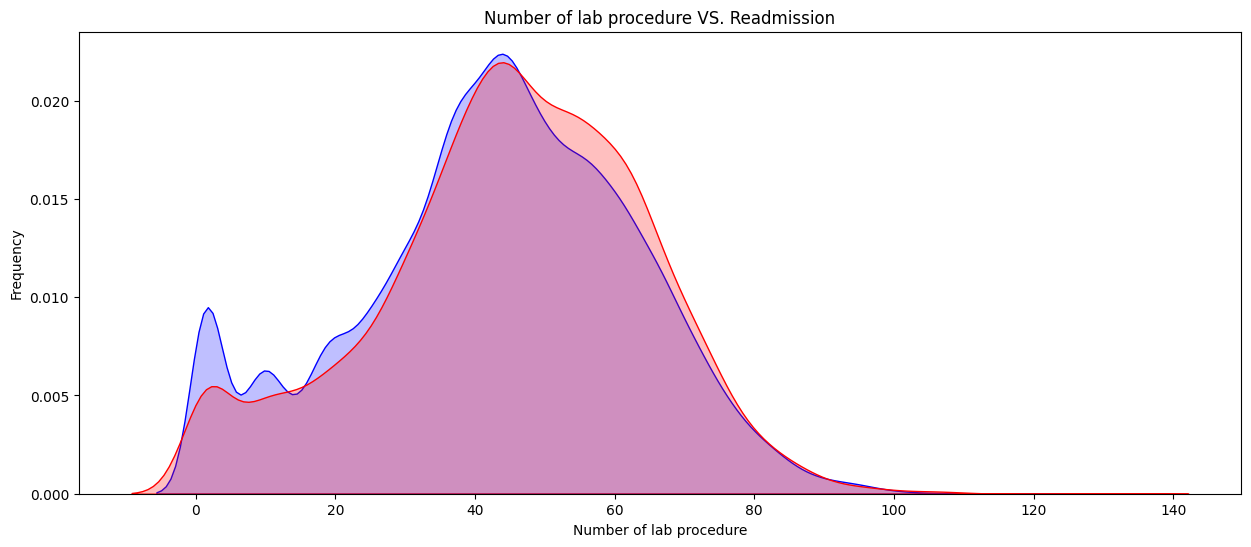

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(dfc.loc[(dfc['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(dfc.loc[(dfc['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

plt.show()

<div class="alert alert-block alert-info" style="text-align: center; font-size: 30px; font-weight: bold;">  
   <a class='anchor' id='3'></a>
   📇 3. Model 📇
</div>


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px; text-align: center;">
    <a href="#sommaire" style="text-decoration: none; color: #3C7090; font-size: 18px; font-weight: bold;">
        🚀 Retour au sommaire 🚀
    </a>
</div>

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h3>· Importation</h3></b>

</div>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dfc = pd.read_csv("/content/drive/MyDrive/diabetic_data_clean.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [ ]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    dfc[name] = dfc[inter[0]] * dfc[inter[1]]

In [ ]:
dfc[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [ ]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient',
                 'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'tolazamide', 'insulin', 'glyburide-metformin', 'gender', 'race',
                 'admission_type_id',
                 'discharge_disposition_id',
                 'admission_source_id', 'max_glu_serum', 'A1Cresult',
                 'diag_1']
dfc[feature_set_no_int].head(5)

,age,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,...,insulin,glyburide-metformin,gender,race,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,diag_1
1,2,3,0,18,0,0,0,9,0,0,...,1,0,1,1,1,1,7,-1,-1,3
2,3,2,5,13,2,0,1,6,0,0,...,0,0,1,2,1,1,7,-1,-1,11
3,4,2,1,16,0,0,0,7,0,0,...,1,0,0,1,1,1,7,-1,-1,1
4,5,1,0,8,0,0,0,5,0,0,...,1,0,0,1,1,1,7,-1,-1,2
5,6,3,6,16,0,0,0,9,0,0,...,1,0,0,1,2,1,2,-1,-1,7


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h3>· Creating the sets</h3></b>

</div>

In [ ]:
# Our target variable is the readmitted column
y = dfc['readmitted']
X = dfc[feature_set_no_int]
dfc['readmitted'].value_counts()

0    62503
1     6126
Name: readmitted, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X.head(1)

,age,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,...,insulin,glyburide-metformin,gender,race,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,diag_1
0,2,3,0,18,0,0,0,9,0,0,...,1,0,1,1,1,1,7,-1,-1,3


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h3>· Normalizing</h3></b>

</div>


In [ ]:
# Applying standard scaling to get more optimized results, relevantless the different amounts of values between columns
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Trial 1 : Random Forest Classification</h4></b>
   <b><h4>Training</h4></b>
</div>

In [ ]:
model = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Testing</h4></b>
</div>


In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[12487    14]
 [ 1216     9]]


In [ ]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('F1 : ', f1_score(y_test, y_pred))

Accuracy :  0.9103890426926999
Precision :  0.391304347826087
Recall :  0.007346938775510204
F1 :  0.014423076923076922


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Saving</h4></b>
</div>


In [ ]:
import joblib
joblib.dump(model, './drive/MyDrive/modele_RF.pkl')

['./drive/MyDrive/modele_RF.pkl']

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Reuse</h4></b>
</div>

In [ ]:
loaded_model = joblib.load('./drive/MyDrive/modele_RF.pkl')
y_pred = loaded_model.predict(X_test)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Interpretation</h4></b>
</div>


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">
We can see that the results are very low. Indeed, recall and precision levels are ok to find cases from class 0 but almost always miss cases from class 1. This is due to the huge imbalance between classes :
</div>



In [ ]:
dfc['readmitted'].value_counts()

0    62503
1     6126
Name: readmitted, dtype: int64


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

To make a balance dataset, we can use SMOTE technique to resolve it. This is what is done in Trial 2 !
</div>


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">
    <b>Balancing data for next tests</b>
</div>

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 50002, 1: 4901})
New dataset shape Counter({0: 50002, 1: 50002})


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Trial 2 : Random Forest Classification</h4></b>
   <b><h4>Training</h4></b>
</div>


In [ ]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Testing</h4></b>
</div>


In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12501
           1       0.31      0.00      0.01      1225

    accuracy                           0.91     13726
   macro avg       0.61      0.50      0.48     13726
weighted avg       0.86      0.91      0.87     13726

[[12490    11]
 [ 1220     5]]


In [ ]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('F1 : ', f1_score(y_test, y_pred))

Accuracy :  0.9103161882558648
Precision :  0.3125
Recall :  0.004081632653061225
F1 :  0.008058017727639002


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Saving</h4></b>
</div>


In [ ]:
import joblib
joblib.dump(model, './drive/MyDrive/modele_RF.pkl')

['./drive/MyDrive/modele_RF.pkl']

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Reuse</h4></b>
</div>

In [ ]:
loaded_model = joblib.load('./drive/MyDrive/modele_RF.pkl')
y_pred = loaded_model.predict(X_test)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Trial 3 : SVM model</h4></b>
   <b><h4>Training</h4></b>
</div>


In [ ]:
model_svm2 = SVC()
model_svm2.fit(X_train, y_train)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Testing</h4></b>
</div>


In [ ]:
y_pred = model_svm2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred, average='macro'))
print('Recall : ', recall_score(y_test, y_pred, average='macro'))
print('F1 : ', f1_score(y_test, y_pred, average='macro'))

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Saving</h4></b>
</div>


In [ ]:
import joblib
joblib.dump(model, './drive/MyDrive/modele_SVM.pkl')

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Reuse</h4></b>
</div>

In [ ]:
loaded_model = joblib.load('modele_SVM.pkl')
y_pred = loaded_model.predict(X_test)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Trial 4 : Random Forest Classification</h4></b><br>
    Dans cette version, nous avons  exploité l'ensemble du preprocessing.
   <b><h4>Training</h4></b>
</div>



In [ ]:
modelV3 = RandomForestClassifier(n_estimators=50)
modelV3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Testing</h4></b>
</div>


In [ ]:
y_pred = modelV3.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12501
           1       0.38      0.00      0.01      1225

    accuracy                           0.91     13726
   macro avg       0.64      0.50      0.48     13726
weighted avg       0.86      0.91      0.87     13726

[[12491    10]
 [ 1219     6]]


In [ ]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('F1 : ', f1_score(y_test, y_pred))

Accuracy :  0.9104618971295352
Precision :  0.375
Recall :  0.004897959183673469
F1 :  0.0096696212731668


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Saving</h4></b>
</div>


In [ ]:
import joblib
joblib.dump(model, './drive/MyDrive/modele_RFV3.pkl')

['./drive/MyDrive/modele_RFV3.pkl']

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Reuse</h4></b>
</div>

In [ ]:
loaded_model = joblib.load('./drive/MyDrive/modele_RFV3.pkl')
y_pred = loaded_model.predict(X_test)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Trial 5 : Random Forest Classification</h4></b><br>
    Dans cette version, nous avons  exploité l'ensemble du preprocessing.
   <b><h4>Training</h4></b>
</div>



In [ ]:
modelV4 = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
modelV4.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Testing</h4></b>
</div>


In [ ]:
y_pred = modelV4.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12501
           1       0.19      0.00      0.00      1225

    accuracy                           0.91     13726
   macro avg       0.55      0.50      0.48     13726
weighted avg       0.85      0.91      0.87     13726

[[12488    13]
 [ 1222     3]]


In [ ]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('F1 : ', f1_score(y_test, y_pred))

Accuracy :  0.9100247705085239
Precision :  0.1875
Recall :  0.0024489795918367346
F1 :  0.0048348106365834


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Saving</h4></b>
</div>


In [ ]:
import joblib
joblib.dump(model, './drive/MyDrive/modele_RFV3.pkl')

['./drive/MyDrive/modele_RFV3.pkl']

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Reuse</h4></b>
</div>

In [ ]:
loaded_model = joblib.load('./drive/MyDrive/modele_RFV3.pkl')
y_pred = loaded_model.predict(X_test)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Trial 6 : Neural Network</h4></b>
   <b><h4>Training</h4></b>
</div>


In [ ]:
model_mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
model_mlpc.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Testing</h4></b>
</div>


In [ ]:
y_pred = model_mlpc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12501
           1       0.11      0.00      0.00      1225

    accuracy                           0.91     13726
   macro avg       0.51      0.50      0.48     13726
weighted avg       0.84      0.91      0.87     13726

[[12493     8]
 [ 1224     1]]


In [ ]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('F1 : ', f1_score(y_test, y_pred))

Accuracy :  0.9102433338190296
Precision :  0.1111111111111111
Recall :  0.0008163265306122449
F1 :  0.001620745542949757


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Saving</h4></b>
</div>


In [ ]:
<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Reuse</h4></b>
</div>import joblib
joblib.dump(model_mlpc, './drive/MyDrive/modele_NN.pkl')

['./drive/MyDrive/modele_NN.pkl']

<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">

   <b><h4>· Reuse</h4></b>
</div>

In [ ]:
loaded_model = joblib.load('./drive/MyDrive/modele_NN.pkl')
y_pred = loaded_model.predict(X_test)


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">
    <h3><b>Deployment </h3></b>
</div>




<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">
    <h4><b>Importation </h4></b>
</div>



In [ ]:
!pip install flask-ngrok

In [ ]:
!pip install pyngrok==4.1.1
!ngrok authtoken 2YZhHeNOXzMLWWPaHgWaFz3aULa_2EKhM15x57GER75y9x3ws

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
import joblib

import numpy as np
from flask import Flask, request, jsonify, render_template
from sklearn.preprocessing import StandardScaler
import pickle
import os


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">
    <h4><b>Make and export the page </h4></b>
</div>



In [ ]:
html_content = """


<!DOCTYPE html>
<html lang="fr">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Diabetes Prediction</title>
    <link
      href="https://cdn.jsdelivr.net/npm/tailwindcss@2.0.1/dist/tailwind.min.css"
      rel="stylesheet"
    />
    <style>
      /* Ajouter des styles CSS personnalisés ici */
      body {
        /* Utilisez la chaîne encodée en base64 ici comme valeur de l'URL */
        background-image: url('https://lh3.googleusercontent.com/drive-viewer/AK7aPaC0GVlEskpJ2hNMLbzoP-3Wt886XgDMxSfad0YleTrTawJXpNrSDoQniTm_8cHNkNAFxteEEC933jSWSk_RMUfzabN4sA=w10000-h10000');
        background-size: cover;
        background-position: center center;
        background-repeat: no-repeat;
        background-attachment: fixed;
      }
    </style>
  </head>

  <body class="bg-gray-100 p-8">
    <div
      class="max-w-md mx-auto bg-white rounded-xl shadow-md overflow-hidden md:max-w-2xl"
    >
      <div class="">
        <div class="p-8">
          <div
            class="uppercase tracking-wide text-sm text-indigo-500 font-semibold"
          >
            Diabetes Prediction using Random Forest
          </div>
          <!-- Zone d'affichage de la prédiction -->
          <div id="prediction" class="mt-4">
            {% if prediction_text %}
            <p class="text-green-500 font-bold">
              Prediction: {{ prediction_text }}
            </p>
            {% endif %}
          </div>
          <form action="/predict" method="post" class="mt-4">
            <div class="mb-4">
              <!-- Age -->
              <div class="mb-4">
                <label
                  class="block text-gray-700 text-sm font-bold mb-2"
                  for="age"
                  >Age</label
                >
                <input
                  type="number"
                  id="age"
                  name="age"
                  value="2"
                  class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
                />
              </div>
            </div>

            <!-- Time in Hospital -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="time_in_hospital"
                >Time in Hospital</label
              >
              <input
                type="number"
                id="time_in_hospital"
                name="time_in_hospital"
                value="3"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Num Lab Procedures -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="num_procedures"
                >Number of Lab Procedures</label
              >
              <input
                type="number"
                id="num_procedures"
                name="num_procedures"
                value="59"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Num Medications -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="num_medications"
                >Number of Medications</label
              >
              <input
                type="number"
                id="num_medications"
                name="num_medications"
                value="18"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Number Outpatient -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="number_outpatient"
                >Number Outpatient</label
              >
              <input
                type="number"
                id="number_outpatient"
                name="number_outpatient"
                value="0"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Number Emergency -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="number_emergency"
                >Number Emergency</label
              >
              <input
                type="number"
                id="number_emergency"
                name="number_emergency"
                value="0"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Number Inpatient -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="number_inpatient"
                >Number Inpatient</label
              >
              <input
                type="number"
                id="number_inpatient"
                name="number_inpatient"
                value="0"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Number diagnoses -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="number_diagnoses"
                >Number of Diagnoses</label
              >
              <input
                type="number"
                id="number_diagnoses"
                name="number_diagnoses"
                value="9"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Metformin -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="metformin"
                >Metformin</label
              >
              <input
                type="number"
                id="metformin"
                name="metformin"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Repaglinide -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="repaglinide"
                >Repaglinide</label
              >
              <input
                type="number"
                id="repaglinide"
                name="repaglinide"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Nateglinide -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="nateglinide"
                >Nateglinide</label
              >
              <input
                type="number"
                id="nateglinide"
                name="nateglinide"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Chlorpropamide -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="chlorpropamide"
                >Chlorpropamide</label
              >
              <input
                type="number"
                id="chlorpropamide"
                name="chlorpropamide"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Glimepiride -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="glimepiride"
                >Glimepiride</label
              >
              <input
                type="number"
                id="glimepiride"
                name="glimepiride"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Glipizide -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="glipizide"
                >Glipizide</label
              >
              <input
                type="number"
                id="glipizide"
                name="glipizide"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Glyburide -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="glyburide"
                >Glyburide</label
              >
              <input
                type="number"
                id="glyburide"
                name="glyburide"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Pioglitazone -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="pioglitazone"
                >Pioglitazone</label
              >
              <input
                type="number"
                id="pioglitazone"
                name="pioglitazone"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Rosiglitazone -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="rosiglitazone"
                >Rosiglitazone</label
              >
              <input
                type="number"
                id="rosiglitazone"
                name="rosiglitazone"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Acarbose -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="acarbose"
                >Acarbose</label
              >
              <input
                type="number"
                id="acarbose"
                name="acarbose"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Tolazamide -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="tolazamide"
                >Tolazamide</label
              >
              <input
                type="number"
                id="tolazamide"
                name="tolazamide"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Insulin -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="insulin"
                >Insulin</label
              >
              <input
                type="number"
                id="insulin"
                name="insulin"
                value="1"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <!-- Glyburide-metformin -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="glyburide-metformin"
                >Glyburide</label
              >
              <input
                type="number"
                id="glyburide-metformin"
                name="glyburide-metformin"
                value="0"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Gender -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="gender"
                >Gender</label
              >
              <input
                type="number"
                id="gender"
                name="gender"
                value="1"
                min="0"
                max="4"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Race -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="race"
                >Race</label
              >
              <input
                type="number"
                id="race"
                name="race"
                value="1"
                min="0"
                max="2"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Admission type -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="admission_type_id"
                >Admission type</label
              >
              <input
                type="number"
                id="admission_type_id"
                name="admission_type_id"
                value="1"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Discharge Disposition -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="discharge_disposition_id"
                >Discharge Disposition</label
              >
              <input
                type="number"
                id="discharge_disposition_id"
                name="discharge_disposition_id"
                value="1"
                min="0"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Admission Source -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="admission_source_id"
                >Admission Source</label
              >
              <input
                type="number"
                id="admission_source_id"
                name="admission_source_id"
                value="7"
                min="0"
                max="7"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Max Glu Serum -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="max_glu_serum"
                >Max Glu Serum</label
              >
              <input
                type="number"
                id="max_glu_serum"
                name="max_glu_serum"
                value="-1"
                min="-1"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- A1Cresult -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="A1Cresult"
                >A1Cresult</label
              >
              <input
                type="number"
                id="A1Cresult"
                name="A1Cresult"
                value="-1"
                min="-1"
                max="1"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>
            <!-- Diagnosis -->
            <div class="mb-4">
              <label
                class="block text-gray-700 text-sm font-bold mb-2"
                for="diag_1"
                >Diagnosis</label
              >
              <input
                type="number"
                id="diag_1"
                name="diag_1"
                value="3"
                min="1"
                max="8"
                class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
              />
            </div>

            <div class="flex items-center justify-between">
              <button
                class="bg-blue-500 hover:bg-blue-700 text-white font-bold py-2 px-4 rounded focus:outline-none focus:shadow-outline"
                type="submit"
              >
                Tester
              </button>
            </div>
          </form>
        </div>
      </div>
    </div>
  </body>
</html>



"""

In [ ]:
# Check if a directory named 'template' exists, if not, create it
template_directory = '/content/templates'

# Using makedirs from os module to create the directory if it doesn't exist
if not os.path.exists(template_directory):
    os.makedirs(template_directory)

# Write the HTML content to a file
with open("templates/index.html", "w") as file:
    file.write(html_content)


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">
    <h4><b>Upload the modele </h4></b>
</div>



In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
model = joblib.load('./drive/MyDrive/modele_RF.pkl')

In [ ]:
ok = [20, 3, 0, 18, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 7, -1, -1, 3]

ok_reshaped = np.array(ok).reshape(1, -1)

sc = StandardScaler()
ok_scaled = sc.fit_transform(ok_reshaped)

model.predict(ok_scaled)

array([0])


<div style="background-color: #DBEDF8; padding: 10px; border-radius: 5px;">
    <h4><b>Web App </h4></b>
</div>



In [ ]:
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST','GET'])
def predict():
    print(request.form.values())
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]

    sc = StandardScaler()
    final_features = sc.fit_transform(final_features)

    prediction = model.predict(final_features)

    output = round(prediction[0], 2)

    return render_template('index.html', prediction_text='This patient must {}'.format(output))



if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://1559-35-199-61-222.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [10/Dec/2023 20:59:42] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Dec/2023 20:59:53] "POST /predict HTTP/1.1" 200 -


<generator object MultiDict.values at 0x7b2bd82eb920>
